In [827]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score

In [828]:
data=pd.read_excel('corpus_PaHaW.xlsx')
data.shape


(75, 10)

In [829]:
data.head()

,ID,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,F,PD,ON,68,R,1115.0,2.0,6.0
1,2,Czech,F,PD,ON,78,R,2110.0,2.0,8.0
2,3,Czech,F,PD,ON,69,R,1556.6,2.0,7.0
3,4,Czech,F,PD,ON,79,R,1691.0,2.0,12.0
4,5,Czech,F,PD,ON,69,R,600.0,2.0,2.0


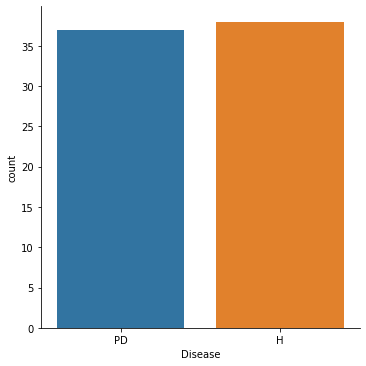

In [830]:
sns.catplot(x='Disease',kind='count',data=data)

In [831]:
label=data.loc[:,'Disease'].to_numpy()
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
lebels=labelencoder_y.fit_transform(label)
lebels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1])

In [832]:
data2=data.drop(['Dominant hand'],axis=1)
data2.head(10)

,ID,Nationality,Sex,Disease,PD status,Age,LED,UPDRS V,Length of PD
0,1,Czech,F,PD,ON,68,1115.00,2.0,6.0
1,2,Czech,F,PD,ON,78,2110.00,2.0,8.0
2,3,Czech,F,PD,ON,69,1556.60,2.0,7.0
3,4,Czech,F,PD,ON,79,1691.00,2.0,12.0
4,5,Czech,F,PD,ON,69,600.00,2.0,2.0
5,6,Czech,F,PD,ON,57,1271.66,2.0,9.0
6,7,Czech,F,PD,ON,78,666.66,3.0,19.0
7,8,Czech,F,PD,ON,58,397.50,1.0,5.0
8,9,Czech,M,PD,ON,78,2066.00,1.0,3.0
9,10,Czech,M,PD,ON,74,1480.00,2.5,3.0


In [833]:
data=data.replace(to_replace="M",value=1)
data=data.replace(to_replace="F",value=2)
data=data.replace(to_replace="ON",value=1)
data=data.replace(to_replace="R",value=1)

In [834]:
data.head(20)

,ID,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,2,PD,1.0,68,1,1115.00,2.0,6.0
1,2,Czech,2,PD,1.0,78,1,2110.00,2.0,8.0
2,3,Czech,2,PD,1.0,69,1,1556.60,2.0,7.0
3,4,Czech,2,PD,1.0,79,1,1691.00,2.0,12.0
4,5,Czech,2,PD,1.0,69,1,600.00,2.0,2.0
5,6,Czech,2,PD,1.0,57,1,1271.66,2.0,9.0
6,7,Czech,2,PD,1.0,78,1,666.66,3.0,19.0
7,8,Czech,2,PD,1.0,58,1,397.50,1.0,5.0
8,9,Czech,1,PD,1.0,78,1,2066.00,1.0,3.0
9,10,Czech,1,PD,1.0,74,1,1480.00,2.5,3.0


In [835]:
data['Sex'] = pd.to_numeric(data['Sex'],downcast='float')
data['Dominant hand'] = pd.to_numeric(data['Dominant hand'],downcast='float')
data['PD status'] = pd.to_numeric(data['PD status'],downcast='float')

In [836]:
data.head(10)

,ID,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,2.0,PD,1.0,68,1.0,1115.00,2.0,6.0
1,2,Czech,2.0,PD,1.0,78,1.0,2110.00,2.0,8.0
2,3,Czech,2.0,PD,1.0,69,1.0,1556.60,2.0,7.0
3,4,Czech,2.0,PD,1.0,79,1.0,1691.00,2.0,12.0
4,5,Czech,2.0,PD,1.0,69,1.0,600.00,2.0,2.0
5,6,Czech,2.0,PD,1.0,57,1.0,1271.66,2.0,9.0
6,7,Czech,2.0,PD,1.0,78,1.0,666.66,3.0,19.0
7,8,Czech,2.0,PD,1.0,58,1.0,397.50,1.0,5.0
8,9,Czech,1.0,PD,1.0,78,1.0,2066.00,1.0,3.0
9,10,Czech,1.0,PD,1.0,74,1.0,1480.00,2.5,3.0


In [837]:
data2=data.drop(['Disease'],axis=1)# dropping the status column
data2.head(10)

,ID,Nationality,Sex,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,2.0,1.0,68,1.0,1115.00,2.0,6.0
1,2,Czech,2.0,1.0,78,1.0,2110.00,2.0,8.0
2,3,Czech,2.0,1.0,69,1.0,1556.60,2.0,7.0
3,4,Czech,2.0,1.0,79,1.0,1691.00,2.0,12.0
4,5,Czech,2.0,1.0,69,1.0,600.00,2.0,2.0
5,6,Czech,2.0,1.0,57,1.0,1271.66,2.0,9.0
6,7,Czech,2.0,1.0,78,1.0,666.66,3.0,19.0
7,8,Czech,2.0,1.0,58,1.0,397.50,1.0,5.0
8,9,Czech,1.0,1.0,78,1.0,2066.00,1.0,3.0
9,10,Czech,1.0,1.0,74,1.0,1480.00,2.5,3.0


In [838]:
features=data2[data2.columns[4:9]].to_numpy(dtype=object,na_value=0)
features

array([[68, 1.0, 1115.0, 2.0, 6.0],
       [78, 1.0, 2110.0, 2.0, 8.0],
       [69, 1.0, 1556.6, 2.0, 7.0],
       [79, 1.0, 1691.0, 2.0, 12.0],
       [69, 1.0, 600.0, 2.0, 2.0],
       [57, 1.0, 1271.66, 2.0, 9.0],
       [78, 1.0, 666.66, 3.0, 19.0],
       [58, 1.0, 397.5, 1.0, 5.0],
       [78, 1.0, 2066.0, 1.0, 3.0],
       [74, 1.0, 1480.0, 2.5, 3.0],
       [65, 1.0, 990.0, 1.0, 2.0],
       [64, 1.0, 1253.33, 3.0, 8.0],
       [69, 1.0, 990.0, 2.5, 17.0],
       [67, 1.0, 1187.5, 2.0, 4.0],
       [75, 1.0, 1370.0, 5.0, 18.0],
       [76, 1.0, 1250.0, 2.5, 17.0],
       [86, 1.0, 750.0, 2.0, 6.0],
       [79, 1.0, 2226.66, 2.0, 8.0],
       [67, 1.0, 645.0, 2.0, 14.0],
       [73, 1.0, 1235.0, 2.0, 9.0],
       [70, 1.0, 1316.66, 4.0, 7.0],
       [60, 1.0, 1143.0, 3.0, 10.0],
       [57, 1.0, 0, 0, 0],
       [92, 1.0, 0, 0, 0],
       [52, 1.0, 0, 0, 0],
       [58, 1.0, 0, 0, 0],
       [69, 1.0, 0, 0, 0],
       [76, 1.0, 0, 0, 0],
       [59, 1.0, 0, 0, 0],
       [62, 1.

In [839]:
scaler=MinMaxScaler()
x=scaler.fit_transform(features)
y=lebels

In [840]:
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=5)
print(x_train.shape)
print(y_train.shape)

(52, 5)
(52,)


In [841]:
from sklearn.linear_model import LogisticRegression


In [842]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [851]:
y_predtr=model.predict(x_train)
y_predtr

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0])

In [852]:
print(accuracy_score(y_train,y_predtr))


0.9615384615384616


In [853]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,0
1,0
2,1
3,0
4,0
5,1
6,0
7,1
8,1
9,1
